#### Satisfaction Analayis

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# Get the current working directory
current_dir = os.getcwd()

# Append the parent directory
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")
from DBConnection.connection import PostgresConnection
from scripts.satisfaction_analyzer import *
from scripts.engagement_analyzer import *
from scripts.experience_analyzer import *


In [2]:
db=PostgresConnection()
db.connect()

Connected to PostgreSQL database


In [3]:
query='select * from xdr_data'
db.execute_query(query)

Query executed successfully


In [4]:
df=db.fetch_data(query)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,Thu Apr 04 2019 15:01:18 GMT+0300 (East Africa...,770.0,Thu Apr 25 2019 17:35:31 GMT+0300 (East Africa...,662.0,1.823653e+09,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,Tue Apr 09 2019 16:04:04 GMT+0300 (East Africa...,235.0,Thu Apr 25 2019 11:15:48 GMT+0300 (East Africa...,606.0,1.365104e+09,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,Tue Apr 09 2019 20:42:11 GMT+0300 (East Africa...,1.0,Thu Apr 25 2019 14:58:13 GMT+0300 (East Africa...,652.0,1.361763e+09,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,Wed Apr 10 2019 03:31:25 GMT+0300 (East Africa...,486.0,Thu Apr 25 2019 10:36:35 GMT+0300 (East Africa...,171.0,1.321510e+09,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,Fri Apr 12 2019 23:10:23 GMT+0300 (East Africa...,565.0,Thu Apr 25 2019 13:40:32 GMT+0300 (East Africa...,954.0,1.089009e+09,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### User Engagement 

In [5]:
satisfaction_analyser=SatisfactionAnalyzer(df)

In [6]:
user_engagement_df = satisfaction_analyser.user_engagement(df)

In [7]:
user_engagement_df

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster
0,3.360100e+10,0.055556,0.095931,36053108.0,8.426375e+08,0.095931,2
1,3.360100e+10,0.055556,0.014026,36104459.0,1.207552e+08,0.014026,0
2,3.360100e+10,0.055556,0.063851,39306820.0,5.566597e+08,0.063851,0
3,3.360101e+10,0.055556,0.044148,20327526.0,4.019932e+08,0.044148,0
4,3.360101e+10,0.111111,0.161598,94280527.0,1.363130e+09,0.161598,2
...,...,...,...,...,...,...,...
106851,3.379000e+10,0.055556,0.077317,26716429.0,6.879252e+08,0.077317,2
106852,3.379000e+10,0.055556,0.050727,35732243.0,4.445751e+08,0.050727,0
106853,3.197021e+12,0.055556,0.022566,37295915.0,1.948281e+08,0.022566,0
106854,3.370000e+14,0.055556,0.063887,56652839.0,5.396350e+08,0.063887,0


In [8]:
metrics = ['Session Frequency', 'Total Duration', 'Total Traffic (Bytes)']
least_engaged_cluster = satisfaction_analyser.get_least_engaged_cluster(
    user_engagement_df, 
    cluster_column='Engagement Cluster', 
    metrics=metrics, 
    verbose=True
)

                    Session Frequency  Total Duration  Total Traffic (Bytes)
Engagement Cluster                                                          
0                            0.057815        0.037848               0.037848
1                            0.194881        0.218017               0.218017
2                            0.081787        0.097088               0.097088
The least engaged cluster is: 0


#### User Experiences Score

In [9]:
user_experience_df=pd.read_csv("../data/user_experience_data.csv")
user_experience_df.drop(columns=['Handset Type']).head()


,Customer Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Experience Cluster
0,33601001722,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,1
1,33601001754,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,1
2,33601002511,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,1
3,33601007832,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,1
4,33601008617,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,2


In [10]:
metrics=['Avg TCP DL Retransmission', 'Avg RTT DL', 'Avg Throughput DL']
worst_experience_cluster = satisfaction_analyser.get_worst_experience_cluster(user_experience_df,'Experience Cluster',metrics)

Worst Experience Cluster: 0


In [11]:
# We have have the user engagement data (user_engagement_df) and experience data (user_experience_df) from Task-2 and Task-3

# Step 1: Calculate the centroids of the least engaged cluster and worst experience cluster
least_engaged_centroid = user_engagement_df[user_engagement_df['Engagement Cluster'] == least_engaged_cluster].mean().values
# Get the centroid for the worst experience cluster
worst_experience_centroid = user_experience_df[user_experience_df['Experience Cluster'] == worst_experience_cluster][metrics].mean().values

In [12]:
worst_experience_centroid

array([7.54728016e+07, 6.81982527e+01, 7.57889138e+04])

In [13]:
user_engagement_df, user_experience_df = satisfaction_analyser.calculate_scores(user_engagement_df,user_experience_df)

In [14]:
user_engagement_df

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster,Engagement Score
0,3.360100e+10,0.055556,0.095931,36053108.0,8.426375e+08,0.095931,2,2.887446e+07
1,3.360100e+10,0.055556,0.014026,36104459.0,1.207552e+08,0.014026,0,2.033803e+08
2,3.360100e+10,0.055556,0.063851,39306820.0,5.566597e+08,0.063851,0,2.326593e+08
3,3.360101e+10,0.055556,0.044148,20327526.0,4.019932e+08,0.044148,0,8.113335e+07
4,3.360101e+10,0.111111,0.161598,94280527.0,1.363130e+09,0.161598,2,5.362083e+08
...,...,...,...,...,...,...,...,...
106851,3.379000e+10,0.055556,0.077317,26716429.0,6.879252e+08,0.077317,2,1.441522e+08
106852,3.379000e+10,0.055556,0.050727,35732243.0,4.445751e+08,0.050727,0,1.207544e+08
106853,3.197021e+12,0.055556,0.022566,37295915.0,1.948281e+08,0.022566,0,1.293141e+08
106854,3.370000e+14,0.055556,0.063887,56652839.0,5.396350e+08,0.063887,0,2.160552e+08


In [15]:
user_experience_df

,Customer Number,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Handset Type,Experience Cluster,Experience Score
0,33601001722,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,1,3.789234e+06
1,33601001754,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),1,3.789234e+06
2,33601002511,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,1,3.789234e+06
3,33601007832,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),1,1.702083e+07
4,33601008617,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723),2,2.101702e+06
...,...,...,...,...,...,...,...,...,...,...
106851,33789996170,2.150440e+05,3001.000000,42.000000,10.000000,9978.0,387.0,Huawei Honor 9 Lite,1,1.681998e+07
106852,33789997247,2.080991e+07,759658.664811,34.000000,6.000000,68.0,48.0,Apple iPhone 8 Plus (A1897),1,3.789234e+06
106853,3197020876596,2.080991e+07,759658.664811,109.795706,17.662883,1.0,0.0,Quectel Wireless. Quectel Ec25-E,1,3.789234e+06
106854,337000037000919,2.080991e+07,759658.664811,109.795706,17.662883,11.0,22.0,Huawei B525S-23A,1,3.789234e+06


In [16]:
# Calculate satisfaction score and report top 10 satisfied customers
merged_df, top_10_satisfied = satisfaction_analyser.calculate_satisfaction(user_engagement_df,user_experience_df)

In [17]:
# Merged dataframe with the same index
merged_df

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster,Engagement Score,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Handset Type,Experience Cluster,Experience Score,Satisfaction Score
0,3.360100e+10,0.055556,0.095931,36053108.0,8.426375e+08,0.095931,2,2.887446e+07,2.080991e+07,759658.664811,46.000000,0.000000,37.0,39.0,Huawei P20 Lite Huawei Nova 3E,1,3.789234e+06,1.633185e+07
1,3.360100e+10,0.055556,0.014026,36104459.0,1.207552e+08,0.014026,0,2.033803e+08,2.080991e+07,759658.664811,30.000000,1.000000,48.0,51.0,Apple iPhone 7 (A1778),1,3.789234e+06,1.035847e+08
2,3.360100e+10,0.055556,0.063851,39306820.0,5.566597e+08,0.063851,0,2.326593e+08,2.080991e+07,759658.664811,109.795706,17.662883,48.0,49.0,undefined,1,3.789234e+06,1.182243e+08
3,3.360101e+10,0.055556,0.044148,20327526.0,4.019932e+08,0.044148,0,8.113335e+07,1.066000e+03,759658.664811,69.000000,15.000000,204.0,44.0,Apple iPhone 5S (A1457),1,1.702083e+07,4.907709e+07
4,3.360101e+10,0.111111,0.161598,94280527.0,1.363130e+09,0.161598,2,5.362083e+08,1.507977e+07,390430.332406,57.000000,2.500000,20197.5,8224.5,Apple iPhone Se (A1723),2,2.101702e+06,2.691550e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,0.055556,0.077317,26716429.0,6.879252e+08,0.077317,2,1.441522e+08,2.150440e+05,3001.000000,42.000000,10.000000,9978.0,387.0,Huawei Honor 9 Lite,1,1.681998e+07,8.048609e+07
106852,3.379000e+10,0.055556,0.050727,35732243.0,4.445751e+08,0.050727,0,1.207544e+08,2.080991e+07,759658.664811,34.000000,6.000000,68.0,48.0,Apple iPhone 8 Plus (A1897),1,3.789234e+06,6.227179e+07
106853,3.197021e+12,0.055556,0.022566,37295915.0,1.948281e+08,0.022566,0,1.293141e+08,2.080991e+07,759658.664811,109.795706,17.662883,1.0,0.0,Quectel Wireless. Quectel Ec25-E,1,3.789234e+06,6.655165e+07
106854,3.370000e+14,0.055556,0.063887,56652839.0,5.396350e+08,0.063887,0,2.160552e+08,2.080991e+07,759658.664811,109.795706,17.662883,11.0,22.0,Huawei B525S-23A,1,3.789234e+06,1.099222e+08


In [18]:
# display the top 10 rows of the DataFrame
top_10_satisfied
  

,MSISDN/Number,Session Frequency,Total Duration,Total UL (Bytes),Total DL (Bytes),Total Traffic (Bytes),Engagement Cluster,Engagement Score,Avg TCP DL Retransmission,Avg TCP UL Retransmission,Avg RTT DL,Avg RTT UL,Avg Throughput DL,Avg Throughput UL,Handset Type,Experience Cluster,Experience Score,Satisfaction Score
6437,3.361489e+10,0.944444,1.000000,689483001.0,8.156743e+09,1.000000,1,6.369949e+09,7.540102e+06,366824.312852,65.222014,17.057488,24324.823529,754.588235,Samsung Galaxy J5 (Sm-J530),2,9.627685e+06,3.189788e+09
92923,3.376054e+10,0.833333,0.962390,703478581.0,7.811295e+09,0.962390,1,6.027122e+09,1.616105e+07,519396.043207,118.663804,17.775255,12051.133333,306.866667,Samsung Galaxy J5 (Sm-J530),1,8.742745e+05,3.013998e+09
13180,3.362578e+10,0.944444,0.960671,729577380.0,7.770043e+09,0.960671,1,5.988542e+09,1.470700e+07,715525.272763,37.987983,5.274287,11577.117647,689.882353,Samsung Galaxy A8 (2018),1,2.315085e+06,2.995429e+09
76363,3.367588e+10,0.833333,0.891624,581568792.0,7.309542e+09,0.891624,1,5.516732e+09,1.066688e+07,489996.999258,65.266667,5.533333,12840.600000,732.333333,Huawei Y7 2018,1,6.357438e+06,2.761545e+09
13526,3.362632e+10,1.000000,0.900708,669650721.0,7.301517e+09,0.900708,1,5.516420e+09,1.273618e+07,422153.313784,63.520314,9.516837,6101.944444,639.444444,Samsung Galaxy J3 (Sm-J330),1,4.292827e+06,2.760356e+09
37052,3.365973e+10,0.888889,0.870604,624260321.0,7.081602e+09,0.870604,1,5.293239e+09,5.215687e+06,387278.144906,47.937500,19.437500,17215.687500,655.875000,Huawei P20,2,1.195070e+07,2.652595e+09
63028,3.366646e+10,0.611111,0.825516,405060976.0,6.903440e+09,0.825516,1,5.099949e+09,1.142436e+07,484524.241243,271.126102,8.817150,29455.727273,561.818182,Samsung Galaxy A8 (2018),2,5.741650e+06,2.552845e+09
92577,3.376041e+10,0.666667,0.805530,521518890.0,6.610852e+09,0.805530,1,4.815482e+09,9.215439e+06,384786.999072,79.848569,9.887628,18710.000000,488.000000,undefined,2,7.952687e+06,2.411718e+09
57241,3.366471e+10,0.611111,0.775989,471244453.0,6.400774e+09,0.775989,1,4.602236e+09,9.876177e+06,488377.877607,67.617791,59.787535,26273.545455,1495.000000,Samsung Galaxy S9 Plus (Sm-G965F),2,7.289113e+06,2.304763e+09
58026,3.366491e+10,0.055556,0.066382,54479129.0,5.637938e+08,0.066382,0,2.400533e+08,4.268432e+09,215354.000000,305.000000,148.000000,52901.000000,2308.000000,Huawei B528S-23A,0,4.192960e+09,2.216506e+09


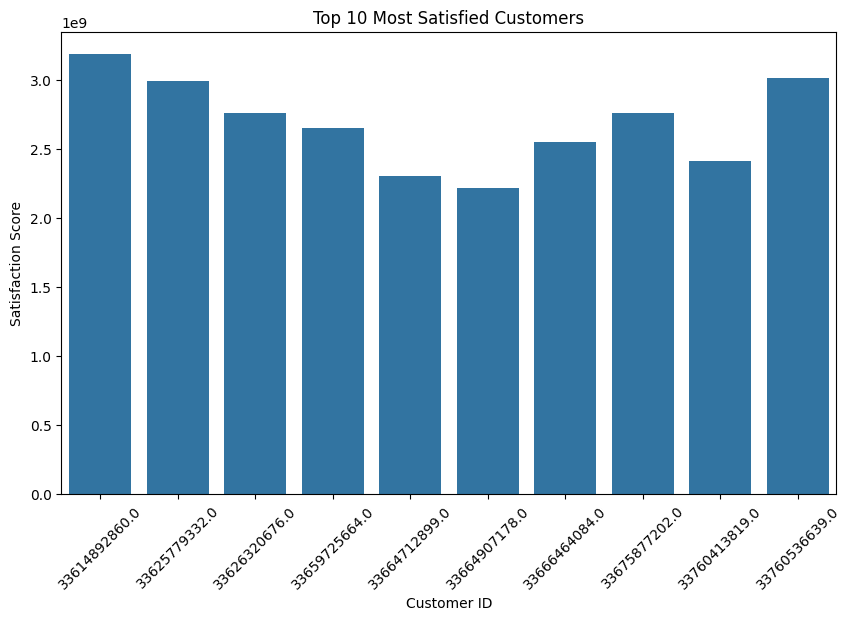

In [19]:
# Plot the top 10 satisfied customers
satisfaction_analyser.plot_top_10_satisfied(top_10_satisfied)

In [20]:
model, coefficients, intercept = satisfaction_analyser.build_regression_model(merged_df)

Regression model coefficients: [0.5 0.5]
Regression model intercept: -1.4901161193847656e-08
